In [2]:
try:
  from google.colab import drive
  drive.mount('/content/drive/')
  shared_drive_foldername = 'NUTRECON'
  root = '/content/drive/Shareddrives/{}/'.format(shared_drive_foldername)
  !pip install pandas==1.4.2
  print('Running Code in Colab')
# ...or locally
except:
  # define the local directory of the project
  root = 'D:/FV/Projects/NUTRECON/nutreconDrive/'
  # root = '/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/'
  print('Running Code locally')

import numpy as np
import pandas as pd
import sys
sys.path.append(root + 'python')
import nutrecon_simulation as sim
from variableCoding import Vars
_v_ = Vars()

import plotly.express as px

beahviour_cols = sim.optimize_cols[:-4]

def get_probLottery(group):
  prob_lotteryChoice = len(group[group['choice'] == 1]) / uniqueLott_Nreps
  return prob_lotteryChoice

Running Code locally
Running Code locally


# Testing Functions & routines

## Task parameters

In [3]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# # ---------------------------- Levy & Glimcher ------------------------------

# # Same-type & mixed type Trials Lottery probabilities
# st_refPs = [1]                                  # Reference option
# st_lottPs = [0.13, 0.22, 0.38, .50, .75]        # Lottery option

# # Same-type task variables
# st_money_refQs = [2]                            # Dolars
# st_money_lottQs = [2, 4.5, 10, 22.5, 50]        # Dolars

# st_cPlus_refQs = [5]                            # candies
# st_cPlus_lottQs = [5, 10, 20, 40, 80]           # candies
# # st_cPlus_refQs = [2]                          # crackers
# # st_cPlus_lottQs = [2, 5, 10, 20, 40]          # crackers

# st_cMinus_refQs = [60]                          # mL water
# st_cMinus_lottQs = [60, 125, 250, 500, 1000]    # mL water

# # Mixed-type task variables
# mt_refQs = [.2]                                 # Dolars
# mt_refPs = [1]
# mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

# mt_cPlus_lottQs = [10, 20, 30, 50,  80]         # candies
# # mt_cPlus_lottQs = [5, 10, 15, 25,  40]        # candies
# mt_cMinus_lottQs = [125, 250, 400, 600,  1000]  # water 

# -------------------------------- NUTRECON ---------------------------------

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


## Subject specific parameters

In [90]:
# Subject specific parameters
st_money_alpha = 0.7
st_cPlus_alpha = 0.5
st_cMinus_alpha = 0.4

st_money_beta = 2.5
st_cPlus_beta = st_money_beta
st_cMinus_beta = st_money_beta

mt_cPlus_beta = 10
mt_cMinus_beta = 10

cPlus_sFactor = .05
cMinus_sFactor = .05

subjectTrials_df = sim._pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, st_money_beta, 
                                              st_cPlus_beta, st_cMinus_beta, mt_cPlus_beta, mt_cMinus_beta, 
                                              cPlus_sFactor, cMinus_sFactor, 
                                              allTrials_df)
subjectTrials_df


,trial_type,ref_type,ref_qt,ref_prob,lott_type,lott_qt,lott_prob,ref_alpha,lott_alpha,beta,sFactor
0,same,Money,1.0,1,Money,1,0.13,0.7,0.7,2.5,1.00
1,same,Money,1.0,1,Money,1,0.22,0.7,0.7,2.5,1.00
2,same,Money,1.0,1,Money,1,0.38,0.7,0.7,2.5,1.00
3,same,Money,1.0,1,Money,1,0.50,0.7,0.7,2.5,1.00
4,same,Money,1.0,1,Money,1,0.75,0.7,0.7,2.5,1.00
...,...,...,...,...,...,...,...,...,...,...,...
745,mixed,Money,0.2,1,CS-,200,0.13,0.7,0.4,10.0,0.05
746,mixed,Money,0.2,1,CS-,200,0.22,0.7,0.4,10.0,0.05
747,mixed,Money,0.2,1,CS-,200,0.38,0.7,0.4,10.0,0.05
748,mixed,Money,0.2,1,CS-,200,0.50,0.7,0.4,10.0,0.05


### Simulate choices

In [88]:
seed = 1
np.random.seed(seed)

In [7]:
subjectTrials_df = sim._get_subject_choices(subjectTrials_df)



subject_choiceCount_df = pd.DataFrame(subjectTrials_df[beahviour_cols].groupby(
                    list(subjectTrials_df[beahviour_cols].columns[:-1])
                    ).apply(
                lambda df: get_probLottery(df)), 
                columns = [_v_.probLotteryChoice_colName]).reset_index()

title = 'Choices'

hover_cols = ['lott_type']
hover_data = {key:False for key in subject_choiceCount_df.columns}

fig = px.line(subject_choiceCount_df, facet_col = 'lott_type', facet_row = 'trial_type',
            x=beahviour_cols[-3], y=_v_.probLotteryChoice_colName, 
            color='lott_prob',  markers=True,
            symbol = 'lott_prob', 
            color_discrete_sequence = px.colors.sequential.dense,
            hover_data = hover_data, 
            category_orders= {
                        'lottery p': sorted(list(subject_choiceCount_df[beahviour_cols[-2]].unique())),
                        }
                )
fig.update_layout(
    title = title,
    legend_title="Subject ID, reward",
)                                
fig.update_xaxes(matches=None)

fig.show()

NameError: name 'subjectTrials_df' is not defined

In [92]:
subject_choiceCount_df

,trial_type,ref_type,ref_qt,ref_prob,lott_type,lott_qt,lott_prob,Prob. of choosing lottery
0,mixed,Money,0.2,1,CS+,40,0.13,0.000000
1,mixed,Money,0.2,1,CS+,40,0.22,0.000000
2,mixed,Money,0.2,1,CS+,40,0.38,0.166667
3,mixed,Money,0.2,1,CS+,40,0.50,0.166667
4,mixed,Money,0.2,1,CS+,40,0.75,0.000000
...,...,...,...,...,...,...,...,...
120,same,Money,1.0,1,Money,20,0.13,0.500000
121,same,Money,1.0,1,Money,20,0.22,0.833333
122,same,Money,1.0,1,Money,20,0.38,1.000000
123,same,Money,1.0,1,Money,20,0.50,1.000000


## Parameter Estimation

In [7]:
alphaMoney0 = st_money_alpha
alphaCplus0 = st_cPlus_alpha
alphaCminus0 = st_cMinus_alpha
st_betaMoney0 = st_money_beta # also used in model with only one beta
st_betaCplus0 = st_cPlus_beta
st_betaCminus0 = st_cMinus_beta
mt_betaCplus0 = mt_cPlus_beta
mt_betaCminus0 = mt_cMinus_beta
sFactorCplus0 = cPlus_sFactor
sFactorCminus0= cMinus_sFactor


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

### Likelihood calculation

In [8]:
# Checking if Likelihood calculation is working for simultaneous estimation and 6 parameters


df = subjectTrials_df.copy()

df['likelihood'] = df.apply(lambda row: sim._get_likelihood(row, x0_6params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


In [9]:
# Checking if Likelihood calculation is working for simultaneous estimation and 10 parameters


df = subjectTrials_df.copy()

df['likelihood'] = df.apply(lambda row: sim._get_likelihood(row, x0_10params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')


Likelihood well calculated.


In [10]:
# Checking if Likelihood calculation is working for stepwise estimation and 6 parameters
df = subjectTrials_df.copy()

(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
    beta,
    cPlus_sFactor, cMinus_sFactor) = x0_6params
st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            beta)
mt_params = (cPlus_sFactor, cMinus_sFactor)


st_mask = df[sim.column_names[0]] == 'same'
df.loc[st_mask,'likelihood'] = df.loc[st_mask,:].apply(lambda row: sim._get_st_likelihood(row, st_params), axis = 1)

mt_mask = df[sim.column_names[0]] == 'mixed'
cPlus_mask = df[sim.column_names[4]] == 'CS+'
cMinus_mask = df[sim.column_names[4]] == 'CS-'

money_alpha_est = st_money_alpha
cPlus_alpha_est = st_cPlus_alpha
cMinus_alpha_est = st_cMinus_alpha
beta_est = st_money_beta

df.loc[mt_mask, sim.optimize_cols[8]] = money_alpha_est
df.loc[cPlus_mask, sim.optimize_cols[9]] = st_cPlus_alpha
df.loc[cMinus_mask, sim.optimize_cols[9]] = cMinus_alpha_est
df.loc[mt_mask, sim.optimize_cols[10]] = beta_est

df.loc[mt_mask,'likelihood'] = df.loc[mt_mask,:].apply(lambda row: sim._get_mt_likelihood(row, mt_params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


In [11]:
# Checking if Likelihood calculation is working for stepwise estimation and 10 parameters

df = subjectTrials_df.copy()

(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
    st_money_beta, st_cPlus_beta, st_cMinus_beta,
    mt_cPlus_beta, mt_cMinus_beta,
    cPlus_sFactor, cMinus_sFactor) = x0_10params
st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            st_money_beta, st_cPlus_beta, st_cMinus_beta)
mt_params = (mt_cPlus_beta, mt_cMinus_beta,
            cPlus_sFactor, cMinus_sFactor)

st_mask = df[sim.column_names[0]] == 'same'
df.loc[st_mask,'likelihood'] = df.loc[st_mask,:].apply(lambda row: sim._get_st_likelihood(row, st_params), axis = 1)

mt_mask = df[sim.column_names[0]] == 'mixed'
cPlus_mask = df[sim.column_names[4]] == 'CS+'
cMinus_mask = df[sim.column_names[4]] == 'CS-'

money_alpha_est = st_money_alpha
cPlus_alpha_est = st_cPlus_alpha
cMinus_alpha_est = st_cMinus_alpha

df.loc[mt_mask, sim.optimize_cols[8]] = money_alpha_est
df.loc[cPlus_mask, sim.optimize_cols[9]] = st_cPlus_alpha
df.loc[cMinus_mask, sim.optimize_cols[9]] = cMinus_alpha_est

df.loc[mt_mask,'likelihood'] = df.loc[mt_mask,:].apply(lambda row: sim._get_mt_likelihood(row, mt_params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']

if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


### Model Fit

In [12]:
# alphaMoney0 = st_money_alpha
# alphaCplus0 = st_cPlus_alpha
# alphaCminus0 = st_cMinus_alpha
# st_betaMoney0 = st_money_beta # also used in model with only one beta
# st_betaCplus0 = st_cPlus_beta
# st_betaCminus0 = st_cMinus_beta
# mt_betaCplus0 = mt_cPlus_beta
# mt_betaCminus0 = mt_cMinus_beta
# sFactorCplus0 = cPlus_sFactor
# sFactorCminus0= cMinus_sFactor

alphaMoney0 = 1
alphaCplus0 = 1
alphaCminus0 = 1
st_betaMoney0 = 1 # also used in model with only one beta
st_betaCplus0 = 1
st_betaCminus0 = 1
mt_betaCplus0 = 1
mt_betaCminus0 = 1
sFactorCplus0 = 1
sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

In [13]:

args = (subjectTrials_df.copy())


res_st, res_mt, st_iterParams_df, mt_iterParams_df = sim.stepwise_estimate(args, x0_6params)



/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/python/nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/python/nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

/mnt/data1/francisco/Apps/anaconda3/envs/nutrecon/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/python/nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

/mnt/data1/francisco/Apps/anaconda3/envs/nutrecon/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/python/nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

/mnt/data1/francisco/Apps/anaconda3/envs/nutrecon/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:

In [14]:
st_iterParams_df

,Money alpha,CS+ alpha,CS- alpha,beta


In [15]:
np.tan(0.461)

0.4966948563901386

In [16]:
sim.print_stepwiseModel_output(res_st, res_mt)

Same type trials
  NaN result encountered.
    - parameters: [1. 1. 1. 1.]
  - std. error: [1. 1. 1. 1.]

Confidene intervals:
  - parameter 1: 1.0 ± 1.96
  - parameter 2: 1.0 ± 1.96
  - parameter 3: 1.0 ± 1.96
  - parameter 4: 1.0 ± 1.96

Mixed type trials
  Optimization terminated successfully.
    - parameters: [0.24516328 0.1014488 ]
  - std. error: [0.05683278 0.01637989]

  Confidene intervals:
    - parameter 1: 0.245 ± 0.111
    - parameter 2: 0.101 ± 0.032


In [17]:
args = (subjectTrials_df.copy())
res_st, res_mt = sim.stepwise_estimate(args, x0_10params)

/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/python/nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/python/nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

/mnt/data1/francisco/Apps/anaconda3/envs/nutrecon/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/python/nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

/mnt/data1/francisco/Apps/anaconda3/envs/nutrecon/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/python/nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

/mnt/data1/francisco/Apps/anaconda3/envs/nutrecon/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:

ValueError: too many values to unpack (expected 2)

In [51]:
sim.print_stepwiseModel_output(res_st, res_mt)

Same type trials
  NaN result encountered.
    - parameters: [1. 1. 1. 1. 1. 1.]
  - std. error: [1. 1. 1. 1. 1. 1.]

Confidene intervals:
  - parameter 1: 1.0 ± 1.96
  - parameter 2: 1.0 ± 1.96
  - parameter 3: 1.0 ± 1.96
  - parameter 4: 1.0 ± 1.96
  - parameter 5: 1.0 ± 1.96
  - parameter 6: 1.0 ± 1.96

Mixed type trials
  Desired error not necessarily achieved due to precision loss.
    - parameters: [7.59643839e-04 7.68670849e-04 3.00706064e+02 1.20265725e+02]
  - std. error: [1.16953471e-04 7.84973491e-05 2.87136786e-01 1.22870916e-01]

  Confidene intervals:
    - parameter 1: 0.001 ± 0.0
    - parameter 2: 0.001 ± 0.0
    - parameter 3: 300.706 ± 0.563
    - parameter 4: 120.266 ± 0.241


In [52]:
res = sim.simultaneous_estimate(args, x0_6params)

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:271: RuntimeWarning:

divide by zero encountered in log

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:271: RuntimeWarning:

divide by zero encountered in log

c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:271: RuntimeWarning:

divide by zero encountered in log

c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:271: RuntimeWarning:

divide by zero encountered in log

c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.

In [53]:
sim.print_simultaneousModel_output(res)

NaN result encountered.
  - parameters: [1. 1. 1. 1. 1. 1.]
  - std. error: [1. 1. 1. 1. 1. 1.]

Confidene intervals:
  - parameter 1: 1.0 ± 1.96
  - parameter 2: 1.0 ± 1.96
  - parameter 3: 1.0 ± 1.96
  - parameter 4: 1.0 ± 1.96
  - parameter 5: 1.0 ± 1.96
  - parameter 6: 1.0 ± 1.96


In [ ]:
res = sim.simultaneous_estimate(args, x0_10params)

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:362: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:362: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:362: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:362: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.l

In [ ]:
sim.print_simultaneousModel_output(res)

Desired error not necessarily achieved due to precision loss.
  - parameters: [6.60772605e-01 8.44967993e-01 8.44119897e-01 1.85517988e+00
 3.71777455e+02 7.70333071e+01 2.66148130e-03 3.02040032e+00
 8.59764771e+01 1.39460227e-01]
  - std. error: [4.53192475e-02 1.08150826e-04 6.42717444e-04 3.31328430e-01
 7.61466405e+00 9.06893221e-01 4.56256523e-04 8.88762040e-01
 2.57293124e+00 3.31200268e-02]

Confidene intervals:
  - parameter 1: 0.661 ± 0.089
  - parameter 2: 0.845 ± 0.0
  - parameter 3: 0.844 ± 0.001
  - parameter 4: 1.855 ± 0.649
  - parameter 5: 371.777 ± 14.925
  - parameter 6: 77.033 ± 1.778
  - parameter 7: 0.003 ± 0.001
  - parameter 8: 3.02 ± 1.742
  - parameter 9: 85.976 ± 5.043
  - parameter 10: 0.139 ± 0.065


# Simulate behaviour for multiple parameters here

## Task Parameters

In [2]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = []                      # mL of CS- yogurt 
st_cMinus_lottQs = []                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = []            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     300
mixed    150
Name: trial_type, dtype: int64


## Initialization Parameters

In [3]:
alphaMoney0 = 1
alphaCplus0 = 1
alphaCminus0 = 1
st_betaMoney0 = 1 # also used in model with only one beta
st_betaCplus0 = 1
st_betaCminus0 = 1
mt_betaCplus0 = 1
mt_betaCminus0 = 1
sFactorCplus0 = 1
sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

## Run simulation and plot behaviour

In [4]:
def reduce_memory(subject_choiceCount_df):
    subject_choiceCount_df.drop(columns = ['ref_prob','ref_type','ref_qt'] , inplace = True)

    for col in subject_choiceCount_df.select_dtypes('object').columns:
        subject_choiceCount_df[col] = subject_choiceCount_df[col].astype('category')

    subject_choiceCount_df['iter'] = subject_choiceCount_df['iter'].astype('int8')
    subject_choiceCount_df['lott_qt'] = subject_choiceCount_df['lott_qt'].astype('int16')
    subject_choiceCount_df['lott_prob'] = subject_choiceCount_df['lott_prob'].astype('float16')
    subject_choiceCount_df[_v_.probLotteryChoice_colName] = subject_choiceCount_df[_v_.probLotteryChoice_colName].astype('float16')
    return subject_choiceCount_df

In [7]:
N_frames = 1

mean_sFactors = np.logspace(.001, 2, N_frames)*4/1000
mean_alphas = np.linspace(.2, 1.4, N_frames)
mean_betas = np.logspace(.001, 3, N_frames)/100

cv_alphas = .3
cv_betas = .3
cv_sFactors = .3

mean_betas = mean_betas.astype('float16')
mean_alphas = mean_alphas.astype('float16')
mean_sFactors = mean_sFactors.astype('float16')

In [37]:
import time
import tqdm
for _ in tqdm.tqdm_notebook(range(10)):
    for _ in tqdm.tqdm_notebook(range(10000000), leave=False):
        pass

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

In [ ]:
from tqdm import tqdm
from numpy import random

csv_path = '/mnt/data1/francisco/Projects/NUTRECON/simResults/multipleParameters/Beta2Alphas1Sfactor.csv'
N_iter = 40
x0 = x0_10params

first = True
for money_alpha in tqdm(range(len(mean_alphas)), desc='Total progress'):
#for money_alpha in mean_alphas:
    #for cPlus_alpha in tqdm(mean_alphas, desc = 'level 1', position=1, leave=False):
    for cPlus_alpha in mean_alphas:
        #for beta in tqdm(mean_betas, desc = 'level 2', position=2, leave=False):
        for beta in mean_betas:
            #for sFactor in tqdm(mean_sFactors, desc = 'level 3', position=3, leave=False):
            for sFactor in mean_sFactors:
                #                         (mean, sd, N_subs)
                mean_std_st_money_alpha = (mean_alphas[money_alpha], money_alpha*cv_alphas, N_iter)
                mean_std_st_cPlus_alpha = (cPlus_alpha, cPlus_alpha*cv_alphas, N_iter)
                mean_std_st_cMinus_alpha = mean_std_st_cPlus_alpha
                mean_std_st_money_beta = (beta, beta*cv_betas, N_iter)
                mean_std_st_cPlus_beta = mean_std_st_money_beta
                mean_std_st_cMinus_beta = mean_std_st_money_beta
                mean_std_mt_cPlus_beta = mean_std_st_money_beta
                mean_std_mt_cMinus_beta = mean_std_st_money_beta
                mean_std_cPlus_sFactor = (sFactor, sFactor*cv_sFactors, N_iter)
                mean_std_cMinus_sFactor = mean_std_cPlus_sFactor

                st_money_alpha_arr = abs(random.normal(*mean_std_st_money_alpha))
                st_cPlus_alpha_arr = abs(random.normal(*mean_std_st_cPlus_alpha))
                st_cMinus_alpha_arr = abs(random.normal(*mean_std_st_cMinus_alpha))
                st_money_beta_arr = abs(random.normal(*mean_std_st_money_beta))

                cPlus_sFactor_arr = abs(random.normal(*mean_std_cPlus_sFactor))
                cMinus_sFactor_arr = abs(random.normal(*mean_std_cMinus_sFactor))

                if x0 == x0_6params:
                    st_param_size = 4
                    mt_param_size = 2
                    st_cPlus_beta_arr = st_money_beta_arr
                    st_cMinus_beta_arr = st_money_beta_arr
                    mt_cPlus_beta_arr = st_money_beta_arr
                    mt_cMinus_beta_arr = st_money_beta_arr

                    st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                                    st_money_beta_arr,] )

                    mt_pars = np.stack([cPlus_sFactor_arr, cMinus_sFactor_arr])

                else:    
                    st_param_size = 6
                    mt_param_size = 4
                    st_cPlus_beta_arr = abs(random.normal(*mean_std_st_cPlus_beta))
                    st_cMinus_beta_arr = abs(random.normal(*mean_std_st_cMinus_beta))
                    mt_cPlus_beta_arr = abs(random.normal(*mean_std_mt_cPlus_beta))
                    mt_cMinus_beta_arr = abs(random.normal(*mean_std_mt_cMinus_beta))

                    st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                                    st_money_beta_arr, st_cPlus_beta_arr, st_cMinus_beta_arr,
                                    ] )

                    mt_pars = np.stack([mt_cPlus_beta_arr, mt_cMinus_beta_arr,
                                        cPlus_sFactor_arr, cMinus_sFactor_arr])

                st_flags = []
                mt_flags = []


                st_estPars = np.zeros((st_param_size, N_iter))
                mt_estPars = np.zeros((mt_param_size, N_iter))
                st_hessians = np.zeros((st_param_size, st_param_size, N_iter))
                mt_hessians = np.zeros((mt_param_size, mt_param_size, N_iter))

                import warnings
                warnings.filterwarnings("ignore")

                #for i in tqdm(range(N_iter), desc = 'level 4', leave=False):
                for i in range(N_iter):
                    # Get parameters per participant
                    st_money_alpha = st_money_alpha_arr[i]
                    st_cPlus_alpha = st_cPlus_alpha_arr[i]
                    st_cMinus_alpha = st_cMinus_alpha_arr[i]
                    st_money_beta = st_money_beta_arr[i]
                    st_cPlus_beta = st_cPlus_beta_arr[i]
                    st_cMinus_beta = st_cMinus_beta_arr[i]
                    mt_cPlus_beta = mt_cPlus_beta_arr[i]
                    mt_cMinus_beta = mt_cMinus_beta_arr[i]
                    cPlus_sFactor = cPlus_sFactor_arr[i]
                    cMinus_sFactor = cMinus_sFactor_arr[i]

                    subjectTrials_df = sim.pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                                                                  st_money_beta, st_cPlus_beta, st_cMinus_beta, 
                                                                  mt_cPlus_beta, mt_cMinus_beta, 
                                                                  cPlus_sFactor, cMinus_sFactor, 
                                                                  allTrials_df)

                    _subject_choiceCount_df = pd.DataFrame(subjectTrials_df[beahviour_cols].groupby(
                                    list(subjectTrials_df[beahviour_cols].columns[:-1])
                                    ).apply(
                                lambda df: get_probLottery(df)), 
                                columns = [_v_.probLotteryChoice_colName]).reset_index()
                    if i == 0:
                        subject_choiceCount_df = _subject_choiceCount_df
                    else:
                        subject_choiceCount_df = pd.concat([subject_choiceCount_df, _subject_choiceCount_df], axis = 0)
                #    subject_choiceCount_df = reduce_memory(subject_choiceCount_df)
                #subject_choiceCount_df['money_alpha'] = mean_alphas[money_alpha]
                #subject_choiceCount_df['cPlus_alpha'] = cPlus_alpha
                #subject_choiceCount_df['beta'] = beta
                #subject_choiceCount_df['sFactor'] = sFactor
                mean_probChoice = subject_choiceCount_df.groupby(['trial_type', 
                                                'ref_type', 'ref_qt', 'ref_prob', 
                                                'lott_type', 'lott_qt','lott_prob']).mean().rename(
                                    columns={_v_.probLotteryChoice_colName: 'mean {}'.format(_v_.probLotteryChoice_colName)})
                std_probChoice = subject_choiceCount_df.groupby(['trial_type', 
                                                'ref_type', 'ref_qt', 'ref_prob', 
                                                'lott_type', 'lott_qt','lott_prob']).std().rename(
                                    columns={_v_.probLotteryChoice_colName: 'std {}'.format(_v_.probLotteryChoice_colName)})
                mean_std_df = mean_probChoice.join(std_probChoice)
                if first:
                    mean_std_df.to_csv(csv_path, index = False)
                    first = False
                else:
                    mean_std_df.to_csv(csv_path, mode = 'a', index = False, header = False)


mean Prob. of choosing lottery  \
trial_type ref_type ref_qt ref_prob lott_type lott_qt lott_prob                                   
mixed      Money    0.2    1        CS+       40      0.13                             0.495833   
                                                      0.22                             0.500000   
                                                      0.38                             0.470833   
                                                      0.50                             0.516667   
                                                      0.75                             0.479167   
...                                                                                         ...   
same       Money    1.0    1        Money     20      0.13                             0.441667   
                                                      0.22                             0.491667   
                                                      0.38                             0.500000   
                                                      0.50                             0.483333   
                                                      0.75                             0.483333   

                                                                 std Prob. of choosing lottery  
trial_type ref_type ref_qt ref_prob lott_type lott_qt lott_prob                                 
mixed      Money    0.2    1        CS+       40      0.13                            0.221647  
                                                      0.22                            0.168790  
                                                      0.38                            0.222929  
                                                      0.50                            0.187956  
                                                      0.75                            0.214129  
...                                                                                        ...  
same       Money    1.0    1        Money     20      0.13                            0.208611  
                                                      0.22                            0.159906  
                                                      0.38                            0.203250  
                                                      0.50                            0.222649  
                                                      0.75                            0.206034  

[75 rows x 2 columns]

In [18]:
all_choiceCount_df

,trial_type,lott_type,lott_qt,lott_prob,Prob. of choosing lottery,iter,money_alpha,cPlus_alpha,beta,sFactor
0,mixed,CS+,40,0.130005,0.500000,0,0.199951,0.199951,0.010025,0.004009
1,mixed,CS+,40,0.219971,0.333252,0,0.199951,0.199951,0.010025,0.004009
2,mixed,CS+,40,0.379883,1.000000,0,0.199951,0.199951,0.010025,0.004009
3,mixed,CS+,40,0.500000,0.666504,0,0.199951,0.199951,0.010025,0.004009
4,mixed,CS+,40,0.750000,0.833496,0,0.199951,0.199951,0.010025,0.004009
...,...,...,...,...,...,...,...,...,...,...
70,same,Money,20,0.130005,0.500000,99,0.199951,0.250000,0.023758,0.022522
71,same,Money,20,0.219971,0.333252,99,0.199951,0.250000,0.023758,0.022522
72,same,Money,20,0.379883,0.666504,99,0.199951,0.250000,0.023758,0.022522
73,same,Money,20,0.500000,0.500000,99,0.199951,0.250000,0.023758,0.022522


# Simulate behaviour here

## Task Parameters

In [33]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


## Initialization Parameters

In [34]:
alphaMoney0 = 1
alphaCplus0 = 1
alphaCminus0 = 1
st_betaMoney0 = 1 # also used in model with only one beta
st_betaCplus0 = 1
st_betaCminus0 = 1
mt_betaCplus0 = 1
mt_betaCminus0 = 1
sFactorCplus0 = 1
sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

## Run simulation and plot behaviour

In [71]:
from tqdm import tqdm
from numpy import random

N_iter = 100
x0 = x0_10params

#                         (mean, sd, N_subs)
mean_std_st_money_alpha = (0.7, 0.1, N_iter)
mean_std_st_cPlus_alpha = (0.8, 0.1, N_iter)
mean_std_st_cMinus_alpha = (0.8, 0.1, N_iter)
mean_std_st_money_beta = (1.8, 0.3, N_iter)
mean_std_st_cPlus_beta = mean_std_st_money_beta
mean_std_st_cMinus_beta = mean_std_st_money_beta
mean_std_mt_cPlus_beta = mean_std_st_money_beta
mean_std_mt_cMinus_beta = mean_std_st_money_beta
mean_std_cPlus_sFactor = (.2, 0.05, N_iter)
mean_std_cMinus_sFactor = mean_std_cPlus_sFactor

st_money_alpha_arr = abs(random.normal(*mean_std_st_money_alpha))
st_cPlus_alpha_arr = abs(random.normal(*mean_std_st_cPlus_alpha))
st_cMinus_alpha_arr = abs(random.normal(*mean_std_st_cMinus_alpha))
st_money_beta_arr = abs(random.normal(*mean_std_st_money_beta))

cPlus_sFactor_arr = abs(random.normal(*mean_std_cPlus_sFactor))
cMinus_sFactor_arr = abs(random.normal(*mean_std_cMinus_sFactor))

if x0 == x0_6params:
    st_param_size = 4
    mt_param_size = 2
    st_cPlus_beta_arr = st_money_beta_arr
    st_cMinus_beta_arr = st_money_beta_arr
    mt_cPlus_beta_arr = st_money_beta_arr
    mt_cMinus_beta_arr = st_money_beta_arr
    
    st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                    st_money_beta_arr,] )

    mt_pars = np.stack([cPlus_sFactor_arr, cMinus_sFactor_arr])
    
else:    
    st_param_size = 6
    mt_param_size = 4
    st_cPlus_beta_arr = abs(random.normal(*mean_std_st_cPlus_beta))
    st_cMinus_beta_arr = abs(random.normal(*mean_std_st_cMinus_beta))
    mt_cPlus_beta_arr = abs(random.normal(*mean_std_mt_cPlus_beta))
    mt_cMinus_beta_arr = abs(random.normal(*mean_std_mt_cMinus_beta))
    
    st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                    st_money_beta_arr, st_cPlus_beta_arr, st_cMinus_beta_arr,
                    ] )

    mt_pars = np.stack([mt_cPlus_beta_arr, mt_cMinus_beta_arr,
                        cPlus_sFactor_arr, cMinus_sFactor_arr])
    
st_flags = []
mt_flags = []


st_estPars = np.zeros((st_param_size, N_iter))
mt_estPars = np.zeros((mt_param_size, N_iter))
st_hessians = np.zeros((st_param_size, st_param_size, N_iter))
mt_hessians = np.zeros((mt_param_size, mt_param_size, N_iter))

import warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(N_iter)):
    # Get parameters per participant
    st_money_alpha = st_money_alpha_arr[i]
    st_cPlus_alpha = st_cPlus_alpha_arr[i]
    st_cMinus_alpha = st_cMinus_alpha_arr[i]
    st_money_beta = st_money_beta_arr[i]
    st_cPlus_beta = st_cPlus_beta_arr[i]
    st_cMinus_beta = st_cMinus_beta_arr[i]
    mt_cPlus_beta = mt_cPlus_beta_arr[i]
    mt_cMinus_beta = mt_cMinus_beta_arr[i]
    cPlus_sFactor = cPlus_sFactor_arr[i]
    cMinus_sFactor = cMinus_sFactor_arr[i]

    subjectTrials_df = sim.pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                                                  st_money_beta, st_cPlus_beta, st_cMinus_beta, 
                                                  mt_cPlus_beta, mt_cMinus_beta, 
                                                  cPlus_sFactor, cMinus_sFactor, 
                                                  allTrials_df)
    
    _subject_choiceCount_df = pd.DataFrame(subjectTrials_df[beahviour_cols].groupby(
                    list(subjectTrials_df[beahviour_cols].columns[:-1])
                    ).apply(
                lambda df: get_probLottery(df)), 
                columns = [_v_.probLotteryChoice_colName]).reset_index()
    _subject_choiceCount_df['iter'] = i
    
    if i == 0:
        subject_choiceCount_df = _subject_choiceCount_df
    else:
        subject_choiceCount_df = pd.concat([subject_choiceCount_df, _subject_choiceCount_df], axis = 0)
        
import seaborn as sns
sns.set(font_scale=1.5)
g = sns.relplot(
    data=subject_choiceCount_df.reset_index(drop=True), x=beahviour_cols[-3], y=_v_.probLotteryChoice_colName, 
    col="lott_type", row = 'trial_type',
    hue="lott_prob", style="lott_prob", kind="line",facet_kws={'sharex': False, 'margin_titles' : True},
)

g.fig.suptitle('Behaviour across simulated subjects\nmean and 95%CI (N={})'.format(N_iter), va='bottom');

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 16.56it/s]


# Simulate behaviour and extract Fitted parameters here

## Task Parameters

In [299]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


## Initialization Parameters

In [11]:
alphaMoney0 = 1
alphaCplus0 = 1
alphaCminus0 = 1
st_betaMoney0 = 1 # also used in model with only one beta
st_betaCplus0 = 1
st_betaCminus0 = 1
mt_betaCplus0 = 1
mt_betaCminus0 = 1
sFactorCplus0 = 1
sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

## Run simulation and plot behaviour

In [284]:
from tqdm import tqdm
from numpy import random

N_iter = 100
x0 = x0_6params

#                         (mean, sd, N_subs)
mean_std_st_money_alpha = (0.7, 0.1, N_iter)
mean_std_st_cPlus_alpha = (0.8, 0.1, N_iter)
mean_std_st_cMinus_alpha = (0.8, 0.1, N_iter)
mean_std_st_money_beta = (1.8, 0.3, N_iter)
mean_std_st_cPlus_beta = mean_std_st_money_beta
mean_std_st_cMinus_beta = mean_std_st_money_beta
mean_std_mt_cPlus_beta = mean_std_st_money_beta
mean_std_mt_cMinus_beta = mean_std_st_money_beta
mean_std_cPlus_sFactor = (.2, 0.05, N_iter)
mean_std_cMinus_sFactor = mean_std_cPlus_sFactor

st_money_alpha_arr = abs(random.normal(*mean_std_st_money_alpha))
st_cPlus_alpha_arr = abs(random.normal(*mean_std_st_cPlus_alpha))
st_cMinus_alpha_arr = abs(random.normal(*mean_std_st_cMinus_alpha))
st_money_beta_arr = abs(random.normal(*mean_std_st_money_beta))

cPlus_sFactor_arr = abs(random.normal(*mean_std_cPlus_sFactor))
cMinus_sFactor_arr = abs(random.normal(*mean_std_cMinus_sFactor))

if x0 == x0_6params:
    st_param_size = 4
    mt_param_size = 2
    st_cPlus_beta_arr = st_money_beta_arr
    st_cMinus_beta_arr = st_money_beta_arr
    mt_cPlus_beta_arr = st_money_beta_arr
    mt_cMinus_beta_arr = st_money_beta_arr
    
    st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                    st_money_beta_arr,] )

    mt_pars = np.stack([cPlus_sFactor_arr, cMinus_sFactor_arr])
    
else:    
    st_param_size = 6
    mt_param_size = 4
    st_cPlus_beta_arr = abs(random.normal(*mean_std_st_cPlus_beta))
    st_cMinus_beta_arr = abs(random.normal(*mean_std_st_cMinus_beta))
    mt_cPlus_beta_arr = abs(random.normal(*mean_std_mt_cPlus_beta))
    mt_cMinus_beta_arr = abs(random.normal(*mean_std_mt_cMinus_beta))
    
    st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                    st_money_beta_arr, st_cPlus_beta_arr, st_cMinus_beta_arr,
                    ] )

    mt_pars = np.stack([mt_cPlus_beta_arr, mt_cMinus_beta_arr,
                        cPlus_sFactor_arr, cMinus_sFactor_arr])
    
st_flags = []
mt_flags = []


st_estPars = np.zeros((st_param_size, N_iter))
mt_estPars = np.zeros((mt_param_size, N_iter))
st_hessians = np.zeros((st_param_size, st_param_size, N_iter))
mt_hessians = np.zeros((mt_param_size, mt_param_size, N_iter))

import warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(N_iter)):
    # Get parameters per participant
    st_money_alpha = st_money_alpha_arr[i]
    st_cPlus_alpha = st_cPlus_alpha_arr[i]
    st_cMinus_alpha = st_cMinus_alpha_arr[i]
    st_money_beta = st_money_beta_arr[i]
    st_cPlus_beta = st_cPlus_beta_arr[i]
    st_cMinus_beta = st_cMinus_beta_arr[i]
    mt_cPlus_beta = mt_cPlus_beta_arr[i]
    mt_cMinus_beta = mt_cMinus_beta_arr[i]
    cPlus_sFactor = cPlus_sFactor_arr[i]
    cMinus_sFactor = cMinus_sFactor_arr[i]

    subjectTrials_df = sim.pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                                                  st_money_beta, st_cPlus_beta, st_cMinus_beta, 
                                                  mt_cPlus_beta, mt_cMinus_beta, 
                                                  cPlus_sFactor, cMinus_sFactor, 
                                                  allTrials_df)
    
    _subject_choiceCount_df = pd.DataFrame(subjectTrials_df[beahviour_cols].groupby(
                    list(subjectTrials_df[beahviour_cols].columns[:-1])
                    ).apply(
                lambda df: get_probLottery(df)), 
                columns = [_v_.probLotteryChoice_colName]).reset_index()
    _subject_choiceCount_df['iter'] = i
    
    res_st, res_mt, _st_iterParams_df, _mt_iterParams_df = sim.stepwise_estimate(subjectTrials_df, x0)

    _st_iterParams_df = _st_iterParams_df.reset_index().rename(columns={'index':'estim. iter'},)
    _st_iterParams_df['iter'] = i
    
    _mt_iterParams_df = _mt_iterParams_df.reset_index().rename(columns={'index':'estim. iter'},)
    _mt_iterParams_df['iter'] = i

    if i == 0:
        st_iterParams_df = _st_iterParams_df
        mt_iterParams_df = _mt_iterParams_df
        subject_choiceCount_df = _subject_choiceCount_df
    else:
        st_iterParams_df = pd.concat([st_iterParams_df, _st_iterParams_df], axis = 0)
        mt_iterParams_df = pd.concat([mt_iterParams_df, _mt_iterParams_df], axis = 0)
        subject_choiceCount_df = pd.concat([subject_choiceCount_df, _subject_choiceCount_df], axis = 0)
    
    st_flags.append(res_st.success)
    mt_flags.append(res_mt.success)

    st_estPars[:, i] = res_st.x
    st_hessians[:, :, i] = res_st.hess_inv
    mt_estPars[:, i] = res_mt.x
    mt_hessians[:, :, i] = res_mt.hess_inv

    
sns.set(font_scale=1.5)
g = sns.relplot(
    data=subject_choiceCount_df.reset_index(drop=True), x=beahviour_cols[-3], y=_v_.probLotteryChoice_colName, 
    col="lott_type", row = 'trial_type',
    hue="lott_prob", style="lott_prob", kind="line",facet_kws={'sharex': False, 'margin_titles' : True},

)

g.fig.suptitle('Behaviour across simulated subjects\nmean and 95%CI (N={})'.format(N_iter), va='bottom');

100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [03:30<00:00,  2.10s/it]


## Pack same type trials results and plot parameters

In [286]:
st_success_df = pd.DataFrame(['success' if p else 'failed' for p in st_flags ], columns = ['model fit'])
st_success_df.index.name = 'iter'

if x0 == x0_6params:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'beta']
else:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'Money beta', 'CS+ ST beta', 'CS- ST beta']


st_params_df = pd.DataFrame(st_pars).T
st_params_df.columns= st_params_colNames
st_params_df.index.name = 'iter'
st_params_df = st_params_df.reset_index().melt(id_vars = 'iter', var_name = 'parameter', value_name = 'Observed value')


st_estParams_df = pd.DataFrame(st_estPars).T
st_estParams_df.columns= st_params_colNames
st_estParams_df.index.name = 'iter'
st_estParams_df = st_estParams_df.reset_index().melt(id_vars = 'iter', var_name = 'parameter', value_name = 'Predicted value')

st_po_df = st_params_df.merge(st_estParams_df, on= ['iter','parameter'])
st_po_df = st_po_df.merge(st_success_df.reset_index(),on='iter')
st_po_df

,iter,parameter,Observed value,Predicted value,model fit
0,0,Money alpha,0.788014,0.722815,success
1,0,CS+ alpha,0.692043,0.657689,success
2,0,CS- alpha,0.779748,0.757609,success
3,0,beta,1.535075,1.873642,success
4,1,Money alpha,0.722453,0.757652,success
...,...,...,...,...,...
395,98,beta,1.704603,2.348058,success
396,99,Money alpha,0.771587,0.873274,success
397,99,CS+ alpha,0.845828,0.837651,success
398,99,CS- alpha,0.921776,0.967946,success


In [287]:
st_pars_minMax = st_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(st_params_colNames)
st_pars_minMax

,min,max
parameter,,
Money alpha,0.428480,0.941158
CS+ alpha,0.481369,0.998788
CS- alpha,0.529841,1.161247
beta,1.177972,2.733851


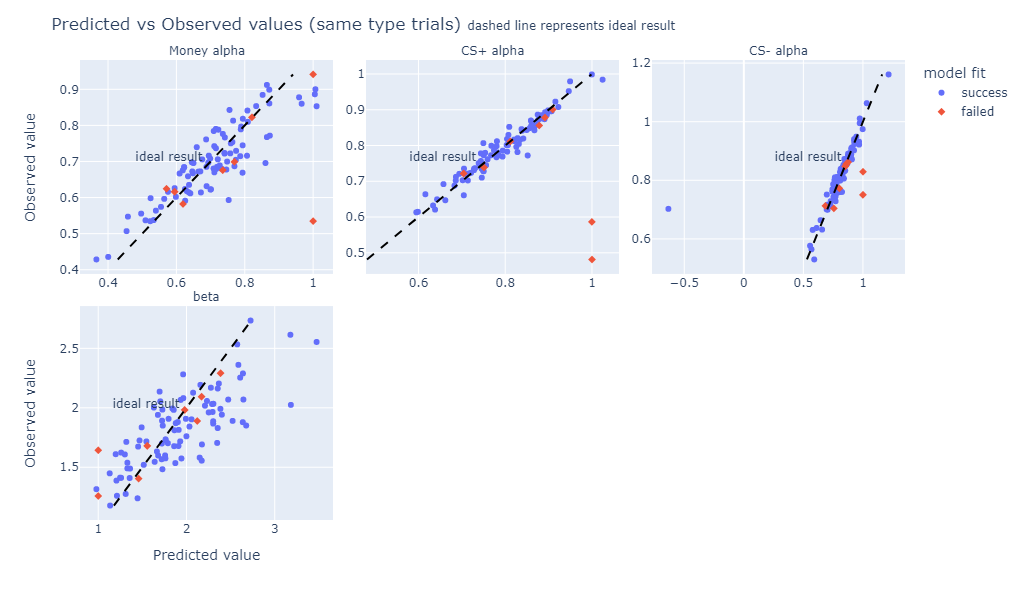

In [288]:
col_wrap = 3
fig = px.scatter(st_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':st_params_colNames,
                                  'model fit': ['success', 'failed']},
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (same type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )
fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[2,0], x1=st_pars_minMax.iloc[2,1], 
                       y0=st_pars_minMax.iloc[2,0], y1=st_pars_minMax.iloc[2,1], 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  label=dict(text="ideal result", textposition = 'bottom right', 
                             xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[0,0], x1=st_pars_minMax.iloc[0,1], 
                       y0=st_pars_minMax.iloc[0,0], y1=st_pars_minMax.iloc[0,1], 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1,
                  label=dict(text="ideal result", textposition = 'bottom right', 
                             xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[1,0], x1=st_pars_minMax.iloc[1,1], 
                       y0=st_pars_minMax.iloc[1,0], y1=st_pars_minMax.iloc[1,1], 
                       line_color="black", line_dash='dash'), 
                  row=0, col=2,
                  label=dict(text="ideal result", textposition = 'bottom right', 
                             xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[3,0], x1=st_pars_minMax.iloc[3,1], 
                       y0=st_pars_minMax.iloc[3,0], y1=st_pars_minMax.iloc[3,1], 
                       line_color="black", line_dash='dash'), 
                  row=1, col=1,
                  label=dict(text="ideal result", textposition = 'bottom right', 
                             xanchor = 'right', yanchor='bottom', textangle=0),
                 )


if x0 != x0_6params:
    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[5,0], x1=st_pars_minMax.iloc[5,1], 
                       y0=st_pars_minMax.iloc[5,0], y1=st_pars_minMax.iloc[5,1], 
                       line_color="black", line_dash='dash'), 
                  row=1, col=0,
                  label=dict(text="ideal result", textposition = 'bottom right', 
                             xanchor = 'right', yanchor='bottom', textangle=0),
                 )

    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[4,0], x1=st_pars_minMax.iloc[4,1], 
                       y0=st_pars_minMax.iloc[4,0], y1=st_pars_minMax.iloc[4,1], 
                       line_color="black", line_dash='dash'), 
                  row=1, col=2,
                  label=dict(text="ideal result", textposition = 'bottom right', 
                             xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.show()
fig.write_html("/mnt/data1/francisco/predicted vs observed same type parameters.html")

## Pack mixed type trials results and plot parameters

In [295]:
mt_success_df = pd.DataFrame(['success' if p else 'failed' for p in mt_flags ], columns = ['model fit'])
mt_success_df.index.name = 'iter'

if x0 == x0_6params:
    mt_params_colNames = ['CS+ sFactor', 'CS- sFactor',]
else:
    mt_params_colNames = ['CS+ MT beta', 'CS- MT beta', 
                          'CS+ sFactor', 'CS- sFactor',]


mt_params_df = pd.DataFrame(mt_pars).T
mt_params_df.columns= mt_params_colNames
mt_params_df.index.name = 'iter'
mt_params_df = mt_params_df.reset_index().melt(id_vars = 'iter', var_name = 'parameter', value_name = 'Observed value')


mt_estParams_df = pd.DataFrame(mt_estPars).T
mt_estParams_df.columns= mt_params_colNames
mt_estParams_df.index.name = 'iter'
mt_estParams_df = mt_estParams_df.reset_index().melt(id_vars = 'iter', var_name = 'parameter', value_name = 'Predicted value')

mt_po_df = mt_params_df.merge(mt_estParams_df, on= ['iter','parameter'])
mt_po_df = mt_po_df.merge(mt_success_df.reset_index(),on='iter')
mt_po_df

,iter,parameter,Observed value,Predicted value,model fit
0,0,CS+ sFactor,0.160717,0.201822,success
1,0,CS- sFactor,0.228383,0.192722,success
2,1,CS+ sFactor,0.236064,0.366446,success
3,1,CS- sFactor,0.174098,0.201513,success
4,2,CS+ sFactor,0.224458,0.148518,success
...,...,...,...,...,...
195,97,CS- sFactor,0.177890,0.160323,success
196,98,CS+ sFactor,0.143049,0.165308,success
197,98,CS- sFactor,0.287649,0.213091,success
198,99,CS+ sFactor,0.207362,0.240881,success


In [296]:
mt_pars_minMax = mt_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(mt_params_colNames)
mt_pars_minMax

,min,max
parameter,,
CS+ sFactor,0.054107,0.326980
CS- sFactor,0.093609,0.318151


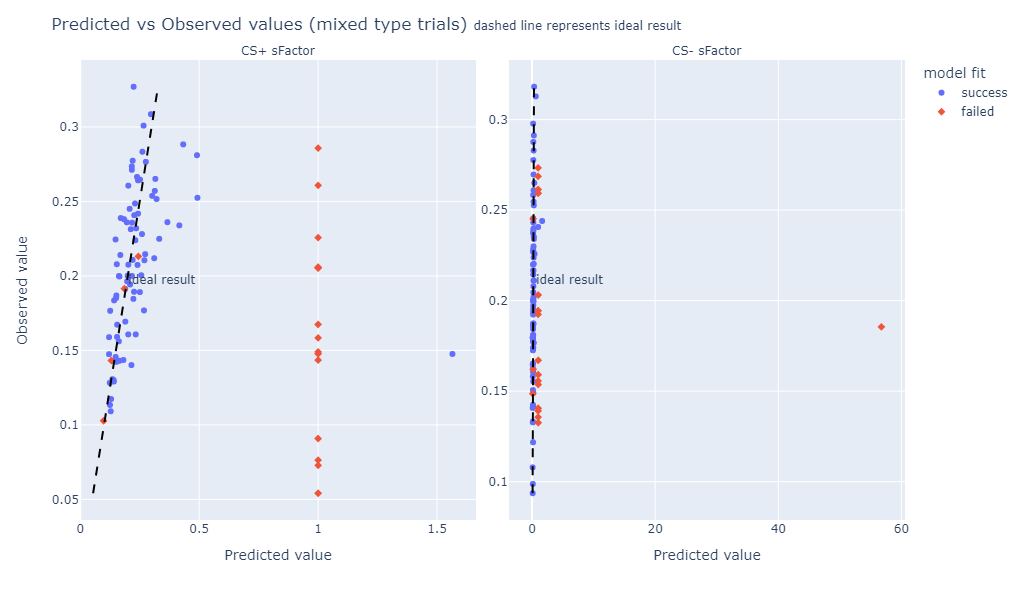

In [298]:
col_wrap = 2
fig = px.scatter(mt_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':mt_params_colNames,
                                  'model fit': ['success', 'failed']},
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (mixed type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )
fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[1,0], x1=mt_pars_minMax.iloc[1,1], 
                       y0=mt_pars_minMax.iloc[1,0], y1=mt_pars_minMax.iloc[1,1], 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  label=dict(text="ideal result", textposition = 'bottom left', 
                             xanchor = 'left', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[0,0], x1=mt_pars_minMax.iloc[0,1], 
                       y0=mt_pars_minMax.iloc[0,0], y1=mt_pars_minMax.iloc[0,1], 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1, 
                  label=dict(text="ideal result", textposition = 'bottom left', 
                             xanchor = 'left', yanchor='bottom', textangle=0),
                 )


    
fig.show()
fig.write_html("/mnt/data1/francisco/predicted vs observed mixed type parameters.html")